# LAB 1 - PCA

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Let's import and print the USA arrest data:

In [56]:
# Load and print USA arrest data
usarrest_df = pd.read_csv('../data/usa_arrest.csv')
print(usarrest_df)

                Murder  Assault  UrbanPop  Rape
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland          11.3      300        6

We can observe that the scale of the values in each feature differs.

Let's explore the mean, variance and standard deviation of each variable (feature):

In [57]:
# Print mean value of each feature
usarrest_df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [58]:
# Print variance value of each feature
usarrest_df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [59]:
# Print std
usarrest_df.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

Let's create arrays containing the values of the observations and the features, separetely:

In [60]:
# Create array of states
states = usarrest_df.index.get_values()

# Create arrays of features
features = usarrest_df.columns.get_values()

Let's convert the data to numpy array to give it as input to scikit-learn:

In [61]:
# Convert data to numpy array
usarrest = usarrest_df.loc[:, features].values

Let's convert the data to have mean 0 and std 1, since feature's values are in different scale:

In [62]:
# Standarize dataset
usarrest_scaled = StandardScaler().fit_transform(usarrest)

Finally, let's perform PCA:

In [63]:
# Perform PCA
pca = PCA()
pca_score_vectors = pca.fit_transform(usarrest_scaled)   # store score vectors in new variable

Let's examine each PCA loading vector:

In [64]:
# Print PCA loadings
columns_pca = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
pca_loadings = (pca.components_).T
pca_loadings_df = pd.DataFrame(pca_loadings, index=features, columns=columns_pca)
print(pca_loadings_df)

              PCA1      PCA2      PCA3      PCA4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024


Let's examine each PCA score vector:

In [65]:
# Print principal component score vectors
pca_score_vectors_df = pd.DataFrame(pca_score_vectors, index=states, columns=columns_pca)
print(pca_score_vectors_df)

                    PCA1      PCA2      PCA3      PCA4
Alabama         0.985566  1.133392 -0.444269  0.156267
Alaska          1.950138  1.073213  2.040003 -0.438583
Arizona         1.763164 -0.745957  0.054781 -0.834653
Arkansas       -0.141420  1.119797  0.114574 -0.182811
California      2.523980 -1.542934  0.598557 -0.341996
Colorado        1.514563 -0.987555  1.095007  0.001465
Connecticut    -1.358647 -1.088928 -0.643258 -0.118469
Delaware        0.047709 -0.325359 -0.718633 -0.881978
Florida         3.013042  0.039229 -0.576829 -0.096285
Georgia         1.639283  1.278942 -0.342460  1.076797
Hawaii         -0.912657 -1.570460  0.050782  0.902807
Idaho          -1.639800  0.210973  0.259801 -0.499104
Illinois        1.378911 -0.681841 -0.677496 -0.122021
Indiana        -0.505461 -0.151563  0.228055  0.424666
Iowa           -2.253646 -0.104054  0.164564  0.017556
Kansas         -0.796881 -0.270165  0.025553  0.206496
Kentucky       -0.750859  0.958440 -0.028369  0.670557
Louisiana 

Let's make a biplot of the first two components:

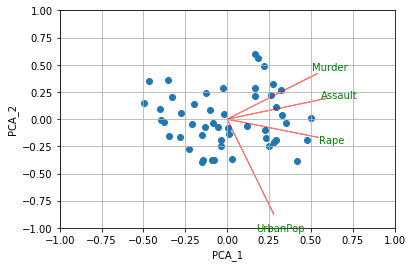

In [78]:
# Plot the first two PCA components

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "VAR"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PCA_{}".format(1))
plt.ylabel("PCA_{}".format(2))
plt.grid()

# Call the function. Use only the 2 PCs.
myplot(pca_score_vectors[:,0:2], pca_loadings[:,0:2], labels=features)
plt.show()

## CREDITS: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

In [63]:
# Print explained variance by each component
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

variance_df = pd.DataFrame([variance, variance_ratio], index = ['Variance', 'Variance_ratio'], columns=columns_pca)
print(variance_df)

                    PCA1      PCA2      PCA3      PCA4
Variance        2.530859  1.009964  0.363840  0.176969
Variance_ratio  0.620060  0.247441  0.089141  0.043358


Text(0.5,0,'Component')

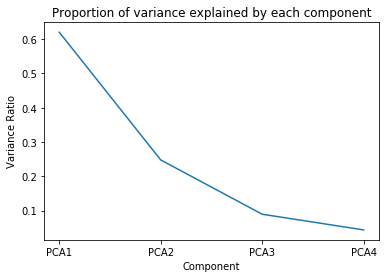

In [70]:
# Plot variance explained by each component 
plt.plot(variance_df.loc['Variance_ratio'])
plt.title('Proportion of variance explained by each component')
plt.ylabel('Variance Ratio')
plt.xlabel('Component')

Text(0.5,0,'Component')

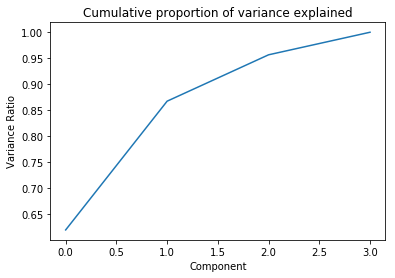

In [75]:
# Plot cumulative sum of variance explained by each component

cumulative_values = np.cumsum(variance_ratio)

plt.plot(cumulative_values)
plt.title('Cumulative proportion of variance explained')
plt.ylabel('Variance Ratio')
plt.xlabel('Component')

In [13]:
import statsmodels.multivariate.pca as sm_pca

In [29]:
# Compute PCA
pc = sm_pca.PCA(x, normalize=False)

# Print loadings 
columns_pca = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
pca_loadings_sm = pd.DataFrame(pc.loadings, index=features, columns=columns_pca)
print(pca_loadings_sm)

              PCA1      PCA2      PCA3      PCA4
Murder   -0.535899  0.418181 -0.341233  0.649228
Assault  -0.583184  0.187986 -0.268148 -0.743407
UrbanPop -0.278191 -0.872806 -0.378016  0.133878
Rape     -0.543432 -0.167319  0.817778  0.089024


In [25]:
# Print scores 
pca_score_sm = pd.DataFrame(pc.scores, index=states, columns=columns_pca)
print(pca_score_sm)

                    PCA1      PCA2      PCA3      PCA4
Alabama        -0.985566  1.133392 -0.444269  0.156267
Alaska         -1.950138  1.073213  2.040003 -0.438583
Arizona        -1.763164 -0.745957  0.054781 -0.834653
Arkansas        0.141420  1.119797  0.114574 -0.182811
California     -2.523980 -1.542934  0.598557 -0.341996
Colorado       -1.514563 -0.987555  1.095007  0.001465
Connecticut     1.358647 -1.088928 -0.643258 -0.118469
Delaware       -0.047709 -0.325359 -0.718633 -0.881978
Florida        -3.013042  0.039229 -0.576829 -0.096285
Georgia        -1.639283  1.278942 -0.342460  1.076797
Hawaii          0.912657 -1.570460  0.050782  0.902807
Idaho           1.639800  0.210973  0.259801 -0.499104
Illinois       -1.378911 -0.681841 -0.677496 -0.122021
Indiana         0.505461 -0.151563  0.228055  0.424666
Iowa            2.253646 -0.104054  0.164564  0.017556
Kansas          0.796881 -0.270165  0.025553  0.206496
Kentucky        0.750859  0.958440 -0.028369  0.670557
Louisiana 

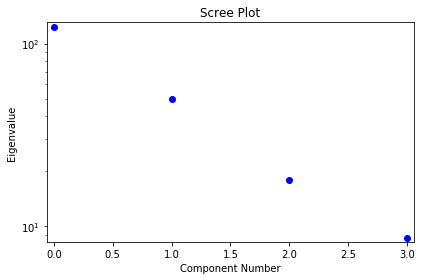

In [31]:
pc.plot_scree()